In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
##Indonesia Movie 
#Dataset Indonesia Movie by IMDb yang mengandung informasi dari 1262 film Indonesia. Data didapatkan dari Kaggle.com
#Content
#There are more than 1200+ Indonesian Movies in the dataset consisting of 11 columns relating to each movie. Those columns are:

#title
#year
#description
#genre
#rating
#users_rating
#votes
#languages
#directors
#actors
#runtime

In [3]:
data_IM = pd.read_csv("datasets/indonesian_movies.csv")
data_IM.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


In [4]:
data_IM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


In [5]:
data_IM.describe(include='all')

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
count,1272,1272.000000,840,1236,376,1272.000000,1272,1272,1265,1272,869
unique,1262,NaN,840,15,11,NaN,312,8,377,1266,85
top,Ratu Ilmu Hitam,NaN,Randy (Hardy Hartono) and Alexa (Masayu Anasta...,Drama,13+,NaN,6,Indonesian,Nayato Fio Nuala,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",90 min
freq,2,NaN,1,456,161,NaN,58,1241,61,4,109
mean,NaN,2007.023585,NaN,NaN,NaN,6.144418,NaN,NaN,NaN,NaN,NaN
std,NaN,12.968560,NaN,NaN,NaN,1.389315,NaN,NaN,NaN,NaN,NaN
min,NaN,1926.000000,NaN,NaN,NaN,1.200000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2006.000000,NaN,NaN,NaN,5.300000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2011.000000,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,NaN,NaN


In [6]:
data_IM['genre'].value_counts().to_frame()

,genre
Drama,456
Comedy,287
Horror,231
Action,132
Adventure,49
Biography,28
Thriller,12
Romance,11
Fantasy,10
Crime,9


In [7]:
data_IM['rating'].value_counts().to_frame()

,rating
13+,161
17+,93
SU,39
D,25
R,23
Not Rated,18
21+,8
TV-MA,4
PG-13,2
TV-14,2


data_IM.isna().any()

In [8]:
# Menghilangkan missing value pada column genre, directors
data_IM = data_IM.dropna(subset=['genre', 'directors'])
data_IM = data_IM.reset_index(drop=True)

In [9]:
# Mengganti Na object dengan Unrated pada column rating
data_IM['rating'] = data_IM['rating'].fillna("Unrated")
data_IM['rating'] = data_IM['rating'].replace({
    "Not Rated": "Unrated",
    "R": "13+",
    "PG-13": "13+",
    "TV-14": "13+",
    "TV-MA": "17+",
    "D": "17+",
    "21+": "17+"
})

In [10]:
# Mengganti nama column runtime menjadi durasi
data_IM = data_IM.rename(columns={"runtime":"duration"})

In [11]:
data_IM["duration"].isna().any()

True

In [12]:
# Mengisi missing value pada column durasi dengan 90 sebagai durasi est
# Mengubah tipe data durasi dari object menjadi int
data_IM["duration"] = data_IM["duration"].fillna("90")
data_IM["duration"] = data_IM["duration"].apply(lambda x: x.replace(" min", ""))
data_IM["duration"] = data_IM["duration"].astype(int)

In [13]:
data_IM["duration"].isna().any()

False

In [14]:
# Mengubah tipe data votes dari object menjadi int
data_IM["votes"] = data_IM["votes"].apply(lambda x: x.replace(",", ""))
data_IM["votes"] = data_IM["votes"].astype(int)

In [15]:
data_IM.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,duration
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109


In [16]:
## Visualisasi

<function matplotlib.pyplot.show(close=None, block=None)>

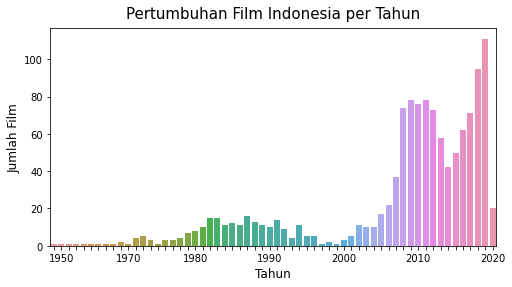

In [17]:
# Pertumbuhan Film per Tahun
f, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x='year', data=data_IM)

# xticks interval
for label in ax.get_xticklabels():
    if np.int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("Pertumbuhan Film Indonesia per Tahun", loc='center', pad=10, fontsize=15, color='black')
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Film", fontsize=12)
plt.show

In [18]:
# Sorting Film dari film tertua
data_IM.sort_values('year',ascending=True).head(6)

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,duration
1228,Loetoeng Kasaroeng,1926,NaN,Fantasy,Unrated,7.2,11,Indonesian,L. Heuveldorp,"['Martoana', 'Oemar', nan, nan, nan, nan, nan,...",60
1227,Darah dan Doa,1950,It tells the story of an Indonesian revolution...,Drama,Unrated,6.6,27,Indonesian,Usmar Ismail,"['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del...",150
1226,Enam Djam di Djogja,1951,Depicting the celebrated recapture of the town...,Drama,Unrated,6.3,9,Indonesian,Usmar Ismail,"['R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A...",116
1225,The Tiger from Tjampa,1953,"Set in the 1930s, and narrated like a ballad f...",Drama,Unrated,6.4,30,Indonesian,D. Djajakusuma,"['Wahid Chan', 'Bambang Hermanto', 'R.D. Ismai...",97
1224,Lewat Djam Malam,1954,A hero of revolution returns to civilian life ...,Drama,Unrated,7.5,94,Indonesian,Usmar Ismail,"['A.N. Alcaff', 'Dhalia', 'Netty Herawati', 'B...",101
1223,Tamu Agung,1955,An impending visit from a VIP causes chaos and...,Comedy,Unrated,5.0,7,Indonesian,Usmar Ismail,"['Cassin Abbas', 'Nina Amora', 'M. Pandji Anom...",107


In [19]:
# Sorting Film dari film terbaru
data_IM.sort_values('year',ascending=False).head(6)

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,duration
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100
11,Milea,2020,Milea made the decision to part with Dilan as ...,Drama,13+,6.1,239,Indonesian,Pidi Baiq,"['Iqbaal Dhiafakhri Ramadhan', 'Vanesha Presci...",102
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80
19,Toko Barang Mantan,2020,Tristan (Reza Rahadian) is the owner of the sh...,Comedy,13+,6.3,71,Indonesian,Viva Westi,"['Reza Rahadian', 'Marsha Timothy', 'Iedil Dzu...",98
18,Titus: Mystery of the Enygma,2020,A mouse-detective with his rabbit and lizard f...,Animation,SU,6.2,10,Indonesian,Dineshkumar Subashchandra,"['Arbani Yasiz', 'Ranty Maria', 'Lukman Sardi'...",95
17,Temen Kondangan,2020,Putri (Prisia Nasution) is challenged to atten...,Comedy,Unrated,6.0,11,Indonesian,Iip Sariful Hanan,"['Prisia Nasution', 'Gading Marten', 'Kevin Ju...",86


In [20]:
# Jumlah film berdasarkan bahasa
data_IM["languages"].value_counts().to_frame().rename(columns={"genre": "Total FIlm"})

,languages
Indonesian,1198
English,21
Japanese,3
Dutch,2
Minangkabau,2
French,1
Malay,1
Mandarin,1


In [21]:
df1 = data_IM["title languages year".split()]
df1.head()

,title,languages,year
0,#FriendButMarried 2,Indonesian,2020
1,4 Mantan,Indonesian,2020
2,Aku Tahu Kapan Kamu Mati,Indonesian,2020
3,Anak Garuda,Indonesian,2020
4,Dignitate,Indonesian,2020


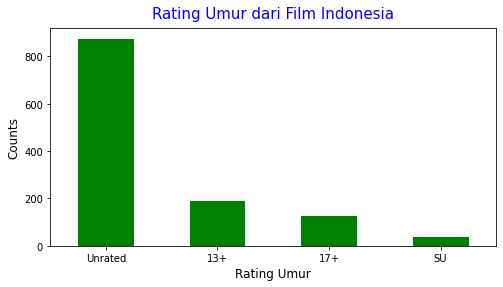

In [22]:
# TV Rating Umur dari film Indoneisa 
tv_rating = data_IM["rating"].value_counts()

tv_rating.plot.bar(color='green', figsize=(8, 4))

plt.title("Rating Umur dari Film Indonesia", loc='center', pad=10, fontsize=15, color='blue')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Rating Umur', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [23]:
df2 = data_IM["title genre".split()]
df2.head()

,title,genre
0,#FriendButMarried 2,Biography
1,4 Mantan,Thriller
2,Aku Tahu Kapan Kamu Mati,Horror
3,Anak Garuda,Adventure
4,Dignitate,Drama


In [24]:
# Top Directors berdasarkna rating
top_directors = data_IM[["directors", "users_rating"]].groupby(["directors"]).mean()
top_directors.sort_values('users_rating', ascending=False).rename(columns={"users_rating": "average_rating"})[:10]

,average_rating
directors,
Ferdinand Almi,9.2
Ray Nayoan,9.1
Senoaji Julius,8.9
Syahrir Arsyad Dini,8.8
Ihdar Nur,8.8
Hari Suhariyadi,8.6
Firman Syah,8.5
Sophan Sophiaan,8.5
Humar Hadi,8.4


Text(0.5, 0, 'Film directed')

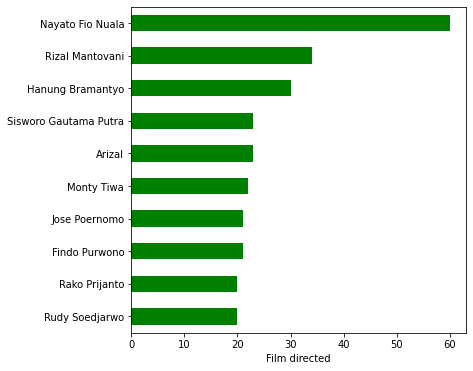

In [25]:
# Visualisasi 10 Top Directors berdasarkan jumlah Film
top_dir = data_IM["directors"].value_counts()[:10].plot.barh(figsize=(6,6), color='green').invert_yaxis()
plt.xlabel("Film directed")

In [26]:
# Top film berdasarkan rating
top_film = data_IM[["title", "year", "users_rating"]].groupby(["title"]).mean()
top_film.sort_values('users_rating', ascending=False).head()

,year,users_rating
title,,
Horas Amang: Tiga Bulan Untuk Selamanya,2019.0,9.4
Salisiah Adaik,2013.0,9.2
Jelita Sejuba: Mencintai Kesatria Negara,2018.0,9.1
Anak Garuda,2020.0,9.1
Turis Romantis,2015.0,8.9


In [27]:
data_IM.corr()

,year,users_rating,votes,duration
year,1.000000,-0.005238,0.030013,0.042812
users_rating,-0.005238,1.000000,0.049259,0.263224
votes,0.030013,0.049259,1.000000,0.098434
duration,0.042812,0.263224,0.098434,1.000000


<AxesSubplot:>

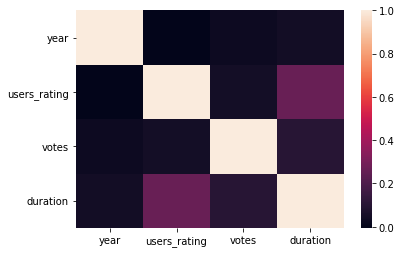

In [28]:
# heatmap dari Indonesia Movie
sns.heatmap(data_IM.corr())